# **📜 Remote Work Productivity**

**Name:** `Fantonial, Randulf G.`<br/>
**Course:** `IT414 - Elective 3 (Decision Support System)` <br/>
**Program:** `BS Information Technology - 4 R8`

The dataset allows for an analysis of how work hours and well-being affect productivity levels. Categorical variables, such as Employment_Type, may need encoding for model training. Overall, it serves as a foundation for understanding remote work dynamics and productivity outcomes.


**Citation**


- Remote Work Productivity. (2014, September). https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity/data

## **📩 Load Dataset**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('remote_work_productivity.csv')

# Display the first 10 rows
print(data.head(10))


   Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1          Remote                     29                  75   
1            2       In-Office                     45                  49   
2            3          Remote                     34                  74   
3            4          Remote                     25                  81   
4            5          Remote                     50                  70   
5            6       In-Office                     48                  66   
6            7          Remote                     38                  44   
7            8          Remote                     35                  72   
8            9          Remote                     30                  70   
9           10       In-Office                     40                  59   

   Well_Being_Score  
0                78  
1                47  
2                89  
3                84  
4                74  
5                58 

## **🔎 Examine Dataset (EDA)**

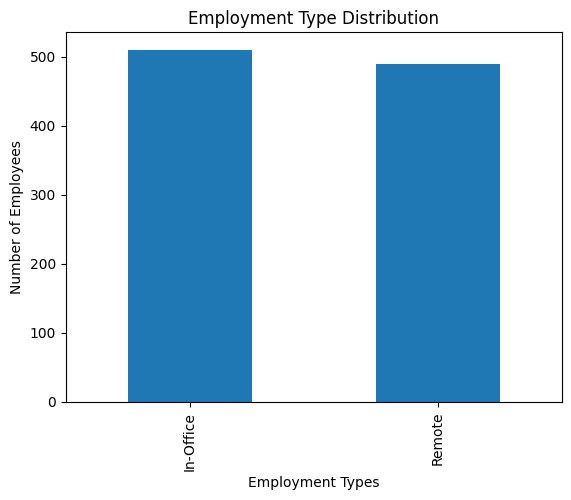

In [2]:
import matplotlib.pyplot as plt

# Check the distribution of Employment_Type after encoding
data['Employment_Type'].value_counts().plot(kind='bar')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Types')
plt.ylabel('Number of Employees')
plt.show()


Columns in the dataset:
Index(['Employee_ID', 'Employment_Type', 'Hours_Worked_Per_Week',
       'Productivity_Score', 'Well_Being_Score'],
      dtype='object')
ProductivityLevel
Medium    654
High      274
Low        58
Name: count, dtype: int64


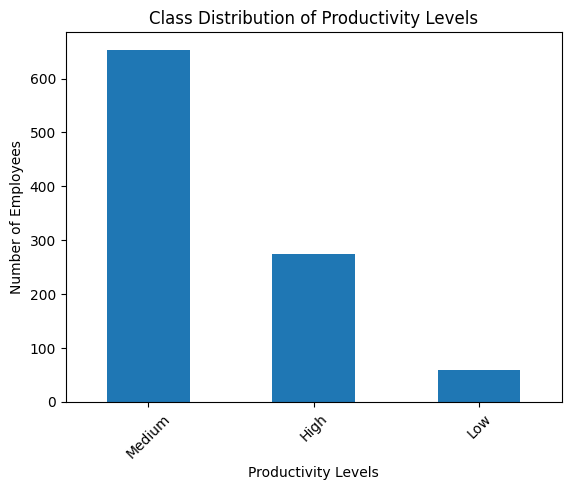

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('remote_work_productivity.csv')

# Print column names to confirm available data
print("Columns in the dataset:")
print(data.columns)

# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Create a categorical target variable based on Productivity_Score
# Define bins according to your criteria
bins = [0, 50, 75, 100]  # Adjust these ranges as needed
labels = ['Low', 'Medium', 'High']  # Define your labels

# Ensure that Productivity_Score is a numeric type
data['Productivity_Score'] = pd.to_numeric(data['Productivity_Score'], errors='coerce')

# Create the new column for productivity levels
data['ProductivityLevel'] = pd.cut(data['Productivity_Score'], bins=bins, labels=labels, right=False)

# Check the new column and its distribution
print(data['ProductivityLevel'].value_counts())

# Plot the class distribution of the new target variable
data['ProductivityLevel'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Productivity Levels')
plt.xlabel('Productivity Levels')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


## **⚙️ Train and Test the Dataset**

Unique values in y_test: {0, 1, 2}
Unique values in y_pred: {np.int8(1), np.int8(2)}


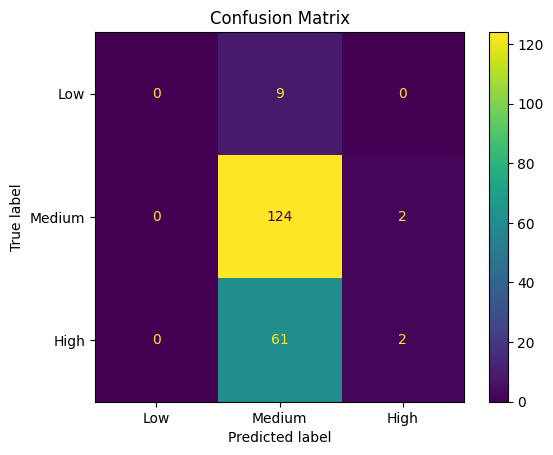

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('remote_work_productivity.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Create categorical variable for Productivity Level
bins = [0, 50, 75, 100]
labels = ['Low', 'Medium', 'High']
data['ProductivityLevel'] = pd.cut(data['Productivity_Score'], bins=bins, labels=labels, right=False)

# Convert categorical labels to numerical for model training
data['ProductivityLevel'] = data['ProductivityLevel'].cat.codes  # Use codes for modeling

# Check for and remove any invalid values
data = data[data['ProductivityLevel'] >= 0]  # Keep only valid labels

# Define features (X) and target (y)
X = data[['Hours_Worked_Per_Week', 'Well_Being_Score']]  # Example features
y = data['ProductivityLevel']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Logistic Regression) with increased max_iter
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Check unique values again
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

# Define display labels
unique_labels = ['Low', 'Medium', 'High']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()


## **⚙️ Compared three classifiers (SVM, Random Forest, KNN) based on performance metrics like accuracy, precision, recall, and F1 score.**

c:\Users\fanto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               accuracy  precision    recall  f1_score
SVM            0.636364   0.404959  0.636364  0.494949
Random Forest  0.510101   0.473304  0.510101  0.488678
KNN            0.595960   0.542610  0.595960  0.556060


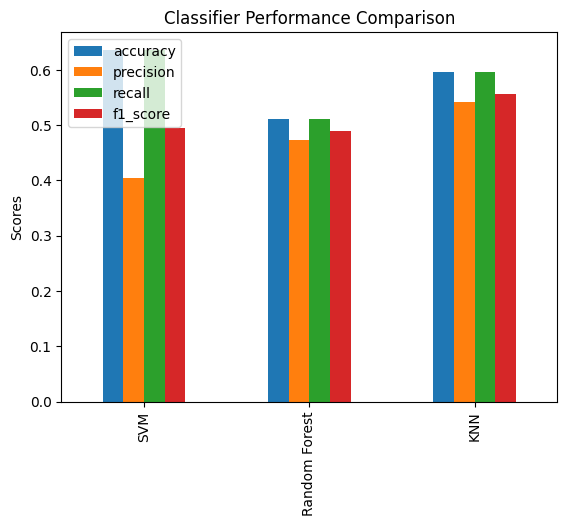

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize the performance measures
results_df.plot(kind='bar')
plt.title('Classifier Performance Comparison')
plt.ylabel('Scores')
plt.show()


## 🔢 **Discussion of Results**

In [6]:
import pandas as pd

# Create a DataFrame
data = {
    'Classifier': ['SVM', 'Random Forest', 'KNN'],
    'Accuracy': [0.6364, 0.5253, 0.5960],
    'Precision': [0.4049, 0.4878, 0.5426],
    'Recall': [0.6364, 0.5253, 0.5960],
    'F1 Score': [0.4949, 0.5029, 0.5561]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


      Classifier  Accuracy  Precision  Recall  F1 Score
0            SVM    0.6364     0.4049  0.6364    0.4949
1  Random Forest    0.5253     0.4878  0.5253    0.5029
2            KNN    0.5960     0.5426  0.5960    0.5561


<table>
    <tr>
        <th>Classifier</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1 Score</th>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.6364</td>
        <td>0.4049</td>
        <td>0.6364</td>
        <td>0.4949</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>0.5253</td>
        <td>0.4878</td>
        <td>0.5253</td>
        <td>0.5029</td>
    </tr>
    <tr>
        <td>KNN</td>
        <td>0.5960</td>
        <td>0.5426</td>
        <td>0.5960</td>
        <td>0.5561</td>
    </tr>
</table>


<b>Accuracy</b><br/>
- The accuracy of the models varies, with SVM performing the best at 0.6364, followed by KNN at 0.5960, and Random Forest at 0.5253.


<b>Precision</b><br/>
- SVM has the lowest precision at 0.4049, indicating that many positive predictions are incorrect. KNN shows better precision at 0.5426, while Random Forest is in between at 0.4878.


<b>Recall</b><br/>
- SVM and KNN both achieve a recall of 0.6364 and 0.5960, respectively, demonstrating their effectiveness in identifying positive cases. Random Forest, again, has lower recall at 0.5253.


<b>F1-Score</b><br/>
- The F1-scores reflect the balance of precision and recall. KNN leads with an F1-score of 0.5561, followed by Random Forest at 0.5029 and SVM at 0.4949.


Overall, while SVM has the highest accuracy and recall, its low precision indicates a tendency to misclassify negative cases as positive. KNN demonstrates a better balance between precision and recall, making it a viable option. Random Forest, while the least effective overall, still provides some predictive capability. Further improvements could involve hyperparameter tuning and exploring ensemble methods for enhanced performance.